In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
reviews = pd.read_csv('reviews.txt', header=None)
labels = pd.read_csv('labels.txt', header=None)
y = (labels=='positive').astype(np.int_)

print(type(reviews))
print(reviews.head())

<class 'pandas.core.frame.DataFrame'>
                                                   0
0  bromwell high is a cartoon comedy . it ran at ...
1  story of a man who has unnatural feelings for ...
2  homelessness  or houselessness as george carli...
3  airport    starts as a brand new luxury    pla...
4  brilliant over  acting by lesley ann warren . ...


In [3]:
reviews.info(), labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       25000 non-null  object
dtypes: object(1)
memory usage: 195.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       25000 non-null  object
dtypes: object(1)
memory usage: 195.4+ KB


(None, None)

In [4]:
# replace br with nothing in reviews

# reviews has br since it is sraped through html.

reviews = reviews.replace({'br': ''}, regex=True)

# a) 
Split the data into test, train and validation sets

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=10000)

y = np.array(y)
X = vectorizer.fit_transform(reviews[0]).toarray()
X.shape

(25000, 10000)

In [6]:
# test train and validation split
# test = 20%
# train = 64%
# validation = 16%

from sklearn.model_selection import train_test_split

X_, X_test, y_, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)


(16000, 10000)
(5000, 10000)
(4000, 10000)


# b)
Explore the representation of the reviews.

In [7]:
df_bow_sklearn = pd.DataFrame(X,columns=vectorizer.get_feature_names_out())
df_bow_sklearn

,aaham,aaron,abandon,abandoned,abbott,abc,abducted,abilities,ability,able,...,zizek,zodiac,zombi,zombie,zombies,zone,zoo,zoom,zorro,zu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24996,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
24997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
24998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Most frequent words
df_bow_sklearn.sum().sort_values(ascending=False).head(20)

the      336713
and      164242
of       145864
to       135720
is       107330
it        96394
in        93968
this      76000
that      73245
was       48208
as        46941
for       44343
with      44125
movie     44039
but       42603
film      40155
you       34230
on        34200
not       30626
he        30138
dtype: int64

In [9]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
for word in X[0]:
    print(word)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


# c)
Train NN with a single hidden layer on the dataset. Tune relevant hyperparameters.

In [24]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import regularizers

nn_model = tf.keras.Sequential([
    layers.Dense(units=64, input_dim=X.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(units=32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(units=1, activation='sigmoid')
])

nn_model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy']) 

In [25]:
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                640064    
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 642177 (2.45 MB)
Trainable params: 642177 (2.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
es = tf.keras.callbacks.EarlyStopping(patience=40, restore_best_weights=True)

history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[es])

Epoch 1/100


2023-10-26 18:58:05.222937: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1280000000 exceeds 10% of free system memory.


500/500 [==============================] - 5s 8ms/step - loss: 0.7793 - accuracy: 0.7692 - val_loss: 0.5591 - val_accuracy: 0.8655
Epoch 2/100
500/500 [==============================] - 4s 8ms/step - loss: 0.6151 - accuracy: 0.8377 - val_loss: 0.5881 - val_accuracy: 0.8535
Epoch 3/100
500/500 [==============================] - 4s 8ms/step - loss: 0.5998 - accuracy: 0.8429 - val_loss: 0.5779 - val_accuracy: 0.8575
Epoch 4/100
500/500 [==============================] - 4s 7ms/step - loss: 0.5929 - accuracy: 0.8441 - val_loss: 0.5506 - val_accuracy: 0.8687
Epoch 5/100
500/500 [==============================] - 3s 7ms/step - loss: 0.5936 - accuracy: 0.8481 - val_loss: 0.5680 - val_accuracy: 0.8640
Epoch 6/100
500/500 [==============================] - 4s 7ms/step - loss: 0.5823 - accuracy: 0.8503 - val_loss: 0.5415 - val_accuracy: 0.8705
Epoch 7/100
500/500 [==============================] - 4s 8ms/step - loss: 0.5896 - accuracy: 0.8472 - val_loss: 0.5356 - val_accuracy: 0.8765
Epoch 8/100

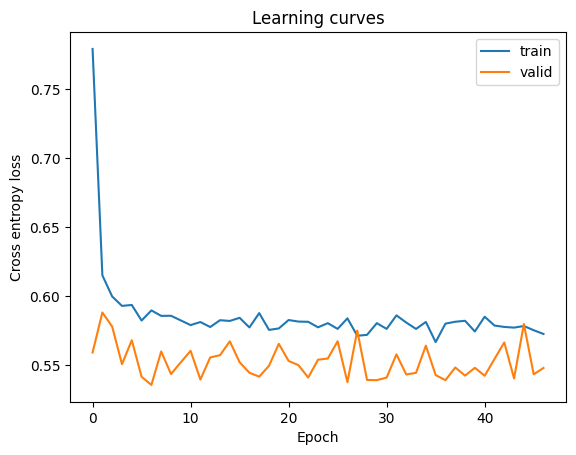

In [27]:
plt.figure()
plt.title("Learning curves")
plt.xlabel("Epoch")
plt.ylabel("Cross entropy loss")
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'valid')
plt.legend()
plt.show()

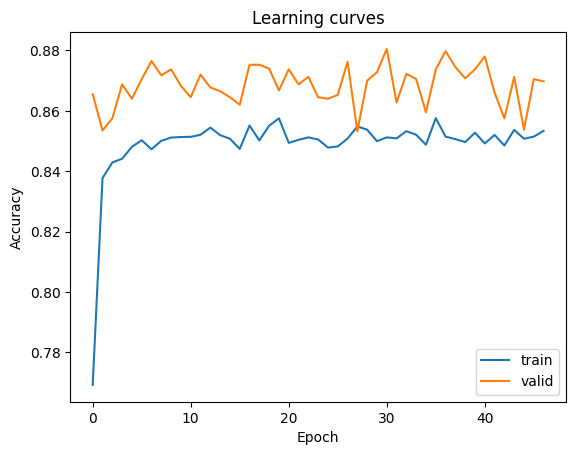

In [28]:
plt.figure()
plt.title("Learning curves")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'valid')
plt.legend()
plt.show()

# d)
Test sentiment-classifier on test set

# e)
Use classifier to classify self written sentences